# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [51]:
from bs4 import BeautifulSoup as bs
import requests
import urllib.request

  
HEADERS = ({'User-Agent':
           'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36',
                           'Accept-Language': 'en-US, en;q=0.5'})

def getNames(soup):
  names = []
  names= soup.find_all('span',class_='a-profile-name')
  for i in range(2,len(names)): 
      names.append(names[i].get_text())
  return names

def getTitle(soup):
  titles = []
  title = soup.find_all('a',class_='review-title-content')
  for i in range(0,len(title)):
    titles.append(title[i].get_text())
  titles[:] = [titles.lstrip('\n') for titles in titles] 
  titles[:] = [titles.rstrip('\n') for titles in titles]
  return titles

def getRating(soup):
  ratings = []
  rating = soup.find_all('i',class_='review-rating') 
  for i in range(2,len(rating)):
    ratings.append(rating[i].get_text()) 
  return ratings

def getReview_text(soup):
  texts = []
  review_text= soup.find_all('span',class_='review-text-content') 
  for i in range(0,len(review_text)):
    texts.append(review_text[i].get_text()) 
    texts[:] = [reviews.lstrip('\n') for reviews in texts]  
    texts[:] = [reviews.rstrip('\n') for reviews in texts]
  return texts

def getReviewDate(soup):
  dates = []
  review_date = soup.find_all('span',class_='review-date')
  for i in range(2,len(review_date)):
    dates.append(review_date[i].get_text())
  return dates

def scrape():
  user_name=[]
  review_title=[]
  ratings=[]
  review_text=[]
  review_dates=[]
  for number in range(1,18):
    link= 'https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='+ str(number) # By attaching the str(number) at the end the link generates dynamically
    print(link)
    webpage = requests.get(link, headers=HEADERS)
    soup = bs(webpage.content,'html.parser')

    nameList = getNames(soup)
    user_name.extend(nameList)

    titleList = getTitle(soup)
    review_title.extend(titleList)

    ratingsList = getRating(soup) 
    ratings.extend(ratingsList)

    reviewtextList = getReview_text(soup)
    review_text.extend(reviewtextList)

    datesList = getReviewDate(soup)
    review_dates.extend(datesList)
  
  print(len(user_name))
  print(len(review_title))
  print(len(ratings))
  print(len(review_text))
  print(len(review_dates))
  return (user_name, review_title, ratings, review_text, review_dates)
    

In [52]:
reviewTuple = scrape()

https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/product-reviews/B07ZPKF8RG/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Apple-iPhone-11-6

In [53]:
user_name=reviewTuple[0]
review_title=reviewTuple[1]
ratings=reviewTuple[2]
review_text=reviewTuple[3]
review_dates=reviewTuple[4]

In [54]:
print("$$$$$  username $$$$$",len(user_name))
print("$$$$$  review_title $$$$",len(review_title))
print("$$$$$  review_whole_text $$$$",len(review_text))
print("$$$$$  ratings $$$$",len(ratings))
print("$$$$$  review_dates $$$$",len(review_dates))

$$$$$  username $$$$$ 430
$$$$$  review_title $$$$ 170
$$$$$  review_whole_text $$$$ 170
$$$$$  ratings $$$$ 170
$$$$$  review_dates $$$$ 170


In [55]:
import pandas as pd
df=pd.DataFrame()
df['User Name']=user_name[0:len(review_title)]
df['Review Title'] = review_title
df['Review Text']=review_text
df['Star']=ratings
df['Review posted time']=review_dates
print(df.head(10))
#df.to_csv("Iphone_reviews.csv")

      User Name                                       Review Title  \
0      [brenda]                                 Not FULLY Unlocked   
1   [Katherine]                      NOT EXPECTED, GREAT PURCHASE!   
2   [Katherine]                             Phone was NOT unlocked   
3      [brenda]            Terribly Flawed. Don’t waste your time.   
4      [brenda]                               Basically brand new!   
5  [James Roth]                             Be careful used phones   
6      [Craigs]                            Best purchase this year   
7      [Craigs]  wasn’t too happy with phone turning off a few ...   
8       [Josie]                               So an amazing phone!   
9       [Josie]                                  The iPhone review   

                                         Review Text                Star  \
0    Purchased this product advertised as fully u...  1.0 out of 5 stars   
1    I was feeling a bit skeptical after I placed...  4.0 out of 5 stars   
2

In [57]:
!pip install --upgrade gensim
!pip install pyLDAvis

In [12]:
import spacy.cli
spacy.cli.download("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [56]:
import nltk
nltk.download('stopwords')

import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
openjdk version "11.0.14" 2022-01-18
OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [59]:
import re
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
import pyLDAvis.gensim_models
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [60]:
df = pd.read_csv('Iphone_reviews.csv', encoding = "ISO-8859-1")
df.head()
data = df['Review Text'].tolist()
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]
pprint(data[:1])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

id2word = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[' Purchased this product advertised as fully unlocked. Inserted my sim card '
 'and it did not work. Contacted my service provider and they checked my IMEI '
 'number and it reported that the phone was still locked by the original '
 'carrier. Phone came in good condition just couldnt use any service provider.']
[['purchased', 'this', 'product', 'advertised', 'as', 'fully', 'unlocked', 'inserted', 'my', 'sim', 'card', 'and', 'it', 'did', 'not', 'work', 'contacted', 'my', 'service', 'provider', 'and', 'they', 'checked', 'my', 'imei', 'number', 'and', 'it', 'reported', 'that', 'the', 'phone', 'was', 'still', 'locked', 'by', 'the', 'original', 'carrier', 'phone', 'came', 'in', 'good', 'condition', 'just', 'couldnt', 'use', 'any', 'service', 'provider']]
['purchased', 'this', 'product', 'advertised', 'as', 'fully', 'unlocked', 'inserted', 'my', 'sim_card', 'and', 'it', 'did', 'not', 'work', 'contacted', 'my', 'service', 'provider', 'and', 'they', 'checked', 'my', 'imei', 'number', 'and', 

[[('advertise', 1),
  ('carrier', 1),
  ('check', 1),
  ('come', 1),
  ('condition', 1),
  ('contacted', 1),
  ('could', 1),
  ('fully', 1),
  ('good', 1),
  ('insert', 1),
  ('lock', 1),
  ('number', 1),
  ('original', 1),
  ('phone', 2),
  ('product', 1),
  ('provider', 2),
  ('purchase', 1),
  ('report', 1),
  ('service', 2),
  ('still', 1),
  ('unlocked', 1),
  ('work', 1)]]

In [61]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

vis

[(0,
  '0.066*"phone" + 0.025*"renew" + 0.024*"side" + 0.024*"however" + '
  '0.019*"may" + 0.017*"read" + 0.016*"screen" + 0.014*"water" + '
  '0.014*"describe" + 0.014*"accessory"'),
 (1,
  '0.030*"refund" + 0.027*"upset" + 0.027*"even" + 0.018*"swap" + 0.018*"wona" '
  '+ 0.018*"didna" + 0.009*"boxing" + 0.009*"unpleasant" + 0.009*"busted" + '
  '0.009*"mad"'),
 (2,
  '0.046*"phone" + 0.041*"compatible" + 0.036*"mobile" + 0.025*"carrier" + '
  '0.022*"paper" + 0.014*"say" + 0.008*"unlocked" + 0.008*"purchase" + '
  '0.007*"new" + 0.007*"choose"'),
 (3,
  '0.001*"phone" + 0.001*"barely" + 0.001*"already" + 0.001*"come" + '
  '0.001*"nick" + 0.001*"dope" + 0.001*"doesna" + 0.001*"cosmetic" + '
  '0.001*"somewhat" + 0.001*"headphone"'),
 (4,
  '0.087*"phone" + 0.033*"buy" + 0.027*"check" + 0.023*"camera" + '
  '0.022*"money" + 0.021*"work" + 0.018*"sell" + 0.017*"waste" + 0.017*"real" '
  '+ 0.015*"maybe"'),
 (5,
  '0.049*"phone" + 0.030*"love" + 0.025*"good" + 0.020*"fine" + 0.018*"ne

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.240718 -0.073329       1        1  30.616682
9      0.224700  0.041832       2        1  17.691202
16     0.138610  0.057631       3        1  10.986047
4      0.125331  0.030445       4        1   6.021651
13     0.130679  0.178672       5        1   5.970471
5      0.088873 -0.165853       6        1   5.254577
0      0.020470  0.034794       7        1   4.069313
18     0.067676 -0.102975       8        1   3.993308
12     0.025665 -0.133854       9        1   3.011438
11    -0.010556  0.052710      10        1   2.800178
10    -0.011170 -0.000825      11        1   2.340406
17    -0.108202 -0.031744      12        1   2.117693
6     -0.056150  0.110702      13        1   1.777041
7     -0.121728  0.003683      14        1   1.002496
19    -0.163664 -0.019313      15        1   0.829725
2     -0.075280  0.007712      16        1   0.720999
1     -0.129772  0.008960      17        1   0.324332
8     -0.135141  0.000184      18        1   0.278326
14    -0.127717  0.003361      19        1   0.146630
3     -0.123339 -0.002794      20        1   0.047486, topic_info=         Term        Freq       Total Category  logprob  loglift
13      phone  454.000000  454.000000  Default   30.000  30.0000
3        come  103.000000  103.000000  Default   29.000  29.0000
47     return   45.000000   45.000000  Default   28.000  28.0000
415      even   25.000000   25.000000  Default   27.000  27.0000
263    refund   28.000000   28.000000  Default   26.000  26.0000
..        ...         ...         ...      ...      ...      ...
157    little    0.002421   17.899434  Topic20   -7.167  -1.2560
60     health    0.002421   10.198968  Topic20   -7.167  -0.6936
407      save    0.002421   11.813513  Topic20   -7.167  -0.8405
402     minus    0.002421    1.403144  Topic20   -7.167   1.2900
16   purchase    0.002421   38.060010  Topic20   -7.167  -2.0104

[1057 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
193       5  0.626919        able
193       8  0.348288        able
49        1  0.191682  absolutely
49        6  0.479204  absolutely
49        9  0.287523  absolutely
...     ...       ...         ...
40        2  0.706554       wrong
40        4  0.176638       wrong
40        8  0.088319       wrong
488       2  0.339298        year
488       4  0.508948        year

[1377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 10, 17, 5, 14, 6, 1, 19, 13, 12, 11, 18, 7, 8, 20, 3, 2, 9, 15, 4])

In [64]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=13, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

print('************** *************************')
print('Perplexity: ', lda_model.log_perplexity(corpus))
print('************** *************************')


coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('************** *************************')

print('Coherence Score: ', coherence_lda)
print('************** *************************')


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

vis

[(0,
  '0.075*"phone" + 0.025*"return" + 0.023*"would" + 0.017*"could" + '
  '0.015*"refurbish" + 0.015*"time" + 0.015*"refund" + 0.014*"take" + '
  '0.014*"call" + 0.013*"month"'),
 (1,
  '0.054*"extremely" + 0.039*"screen" + 0.023*"message" + 0.015*"right" + '
  '0.014*"upset" + 0.014*"authentic" + 0.013*"even" + 0.009*"icloud" + '
  '0.009*"apparent" + 0.009*"account"'),
 (2,
  '0.026*"restock" + 0.021*"fee" + 0.021*"pricey" + 0.016*"communication" + '
  '0.016*"install" + 0.011*"rest" + 0.011*"wonder" + 0.011*"protective" + '
  '0.011*"microfracture" + 0.011*"scamme"'),
 (3,
  '0.018*"restart" + 0.018*"working" + 0.018*"flicker" + 0.012*"else" + '
  '0.011*"fine" + 0.008*"lock" + 0.007*"screen" + 0.007*"could" + '
  '0.006*"point" + 0.006*"load"'),
 (4,
  '0.070*"phone" + 0.034*"work" + 0.018*"buy" + 0.015*"bad" + 0.015*"would" + '
  '0.013*"think" + 0.013*"say" + 0.013*"time" + 0.013*"speaker" + 0.013*"try"'),
 (5,
  '0.050*"phone" + 0.048*"come" + 0.026*"new" + 0.023*"charger" + 

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.219386  0.039503       1        1  37.137440
5      0.187819  0.183924       2        1  17.259044
0      0.155357 -0.120887       3        1  17.195079
4      0.157896 -0.147387       4        1   9.694563
11     0.016917  0.031748       5        1   5.773873
12    -0.100314  0.025606       6        1   4.067782
10     0.006101 -0.041353       7        1   3.792774
8     -0.066723  0.091214       8        1   1.479038
6     -0.130327 -0.015343       9        1   1.248417
1     -0.120577 -0.002621      10        1   1.017591
7     -0.110977 -0.017133      11        1   0.480709
2     -0.130144 -0.015145      12        1   0.472840
3     -0.084414 -0.012126      13        1   0.380849, topic_info=           Term        Freq       Total Category  logprob  loglift
3          come   95.000000   95.000000  Default  30.0000  30.0000
38       screen   83.000000   83.000000  Default  29.0000  29.0000
13        phone  434.000000  434.000000  Default  28.0000  28.0000
35    protector   32.000000   32.000000  Default  27.0000  27.0000
47       return   43.000000   43.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
283     respond    0.016466    3.858328  Topic13  -7.3317   0.1138
1288    balloon    0.016324    1.843726  Topic13  -7.3403   0.8436
1289   discover    0.016324    1.843726  Topic13  -7.3403   0.8436
1290    explain    0.016324    1.843726  Topic13  -7.3403   0.8436
1291    prepare    0.016324    1.843726  Topic13  -7.3403   0.8436

[680 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
49        2  0.913345  absolutely
620       2  0.840760   accessory
1282     10  0.811228     account
1047      7  0.576256      accuse
671       3  0.949305  activation
...     ...       ...         ...
116       6  0.052339       would
647       4  0.801813     wouldna
647       7  0.133635     wouldna
722       4  0.860758       write
488       1  0.837572        year

[817 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 1, 5, 12, 13, 11, 9, 7, 2, 8, 3, 4])

In [63]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

print('************** *************************')
print('Perplexity: ', lda_model.log_perplexity(corpus))
print('************** *************************')


coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n')
print('************** *************************')
print('Coherence Score: ', coherence_lda)


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

vis

[(0,
  '0.071*"phone" + 0.015*"buy" + 0.012*"work" + 0.011*"time" + 0.010*"get" + '
  '0.010*"return" + 0.010*"would" + 0.009*"screen" + 0.008*"new" + '
  '0.008*"come"'),
 (1,
  '0.042*"phone" + 0.021*"come" + 0.018*"screen" + 0.017*"work" + '
  '0.012*"scratch" + 0.011*"new" + 0.009*"look" + 0.009*"apple" + 0.009*"buy" '
  '+ 0.008*"good"')]
************** *************************
Perplexity:  -6.429014106817113
************** *************************


************** *************************
Coherence Score:  0.3642645350521527


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.061522  0.0       1        1  64.026172
1     -0.061522  0.0       2        1  35.973828, topic_info=          Term       Freq      Total Category  logprob  loglift
3         come  85.000000  85.000000  Default  30.0000  30.0000
37     scratch  40.000000  40.000000  Default  29.0000  29.0000
38      screen  79.000000  79.000000  Default  28.0000  28.0000
47      return  42.000000  42.000000  Default  27.0000  27.0000
12    original  17.000000  17.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
82   refurbish  11.844470  29.662976   Topic2  -5.3015   0.1043
75        give  10.063885  19.487975   Topic2  -5.4644   0.3615
116      would  13.308474  54.392631   Topic2  -5.1850  -0.3854
43          go  12.588063  46.067191   Topic2  -5.2406  -0.2750
105      month  10.611289  30.542034   Topic2  -5.4114  -0.0348

[167 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
49        1  0.212548  absolutely
49        2  0.743918  absolutely
620       2  0.950809   accessory
117       1  0.993929    activate
360       1  1.009678         ago
...     ...       ...         ...
278       2  0.125316        week
21        1  0.541856        work
21        2  0.453390        work
116       1  0.753779       would
116       2  0.239003       would

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [67]:
import os.path
from gensim import corpora
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

def load_data(path,file_name):
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    stopwords_list = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        tokens = tokenizer.tokenize(i.lower())
        stoppedWords = [i for i in tokens if not i in stopwords_list]
        stemWords = [stemmer.stem(i) for i in stoppedWords]
        texts.append(stemWords)
    return texts
  
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    corpusTuple=prepare_corpus(doc_clean)
    dictionary = corpusTuple[0]
    doc_term_matrix = corpusTuple[1]
    lsamodel = LsiModel(doc_term_matrix, 
                        num_topics=number_of_topics, 
                        id2word = dictionary)
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, 
                         num_topics=number_of_topics, 
                         id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary,
                                                            doc_term_matrix,
                                                            doc_clean,
                                                            stop,
                                                            start, 
                                                            step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

number_of_topics=7
words=10
document_list,titles=load_data("","Iphone_reviews.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 213


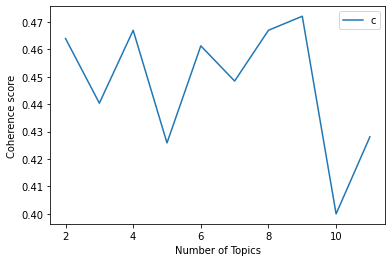

In [66]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here





## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Write your code here





## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

We are surrounded by massive, ever-increasing quantities of text that contain vast amounts of data.

Many recent methodologies require the text to be highly organized or annotated in order to examine it. 
This is a demanding and costly task.

Topic modeling is a branch of natural language processing that can evaluate text without requiring annotation, making it useful
 for large-scale analysis.

Latent Dirichlet Allocation is a prominent technique to topic modeling (LDA).

Topic modeling using LDA is an experimental technique that uses a generative probabilistic process to uncover latent topic structures in text data. These selected subjects can aid comprehension and serve as inputs for future investigation.

To model subjects, LDA employs Bayesian statistics and Dirichlet distributions in an iterative process.

The core of LDA is the iterative examination of topic distributions inside texts and word distributions within subjects, which results in the discovery of coherent themes.

LDA is a popular method for a reason: it has a natural appeal, is simple to implement, and generates good results.

It also aids in the resolution of supervised learning's primary flaw: the requirement for labeled data.